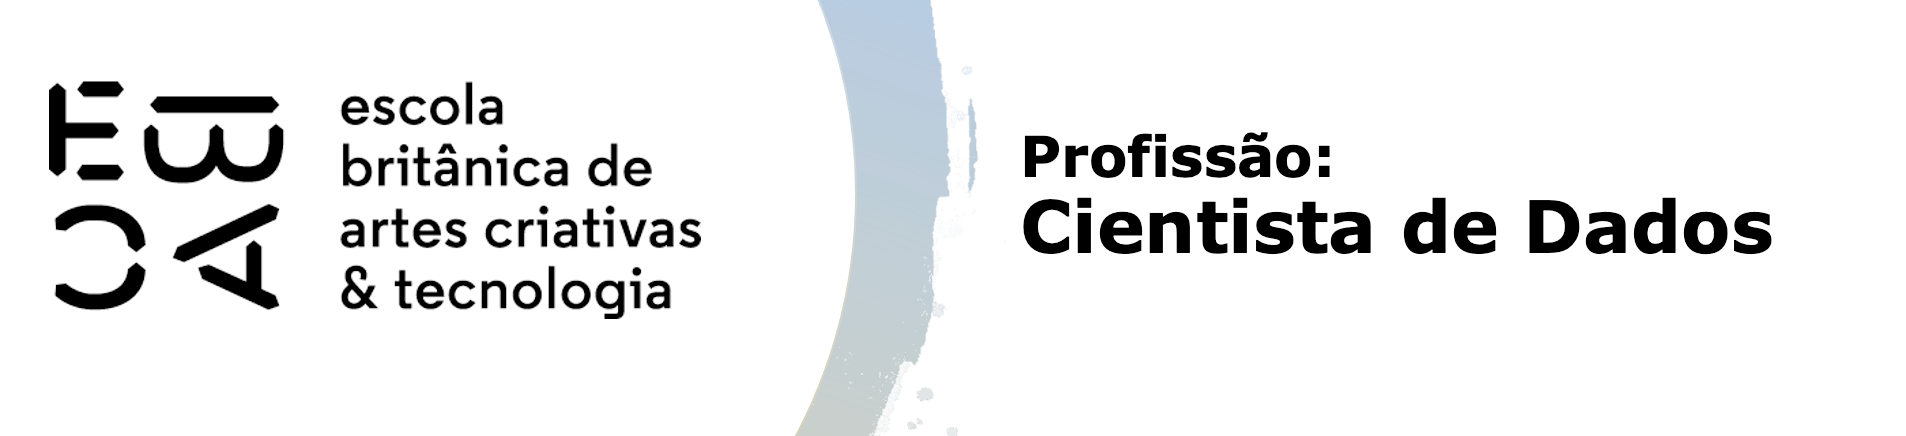

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df_raw = pd.read_pickle('base_nfp.pkl')
df_raw.head()

CNPJ emit.                                           Emitente  \
0  03.476.811/0741-98                      DIA BRASIL SOCIEDADE LIMITADA   
1  43.101.310/0001-05                         AUTO POSTO ZANWAL LTDA EPP   
2  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
3  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
4  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   

    No. Data Emissão  Valor NF Data Registro  Créditos Situação do Crédito  \
0   537   2017-06-30     24.68    2017-06-30      0.00            Liberado   
1  2894   2017-06-30     50.00    2017-06-30      0.00            Liberado   
2   699   2017-06-30     27.00    2017-06-30      0.44            Liberado   
3   698   2017-06-30    111.50    2017-06-30      1.81            Liberado   
4   694   2017-06-30    125.00    2017-06-30      2.03            Liberado   

    Ano  Semestre   Retorno  flag_credito     categoria  
0  2017         1  0.000000             0       Mercado  
1  2017         1  0.000000             0    Auto posto  
2  2017         1  0.016296             1  Restaurantes  
3  2017         1  0.016233             1  Restaurantes  
4  2017         1  0.016240             1  Restaurantes

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [20]:
df_raw['resposta'] = np.where(df_raw['flag_credito'] > 0,1,0)

In [62]:
# Conversão para datetime e filtragem por Data 
df_raw['Data Emissão'] = pd.to_datetime(df_raw['Data Emissão'])
df = df_raw[df_raw['Data Emissão'] >= '2020-01-01'].copy()

# Extração de informações temporais
df['dia_semana'] = df['Data Emissão'].dt.dayofweek  # 0 = Segunda, ..., 6 = Domingo
df['fim_semana'] = df['dia_semana'].isin([5, 6]).astype(int)  # Fim de semana = Sábado/Domingo
df['dia_mes'] = df['Data Emissão'].dt.day
df['trimestre'] = df['Data Emissão'].dt.quarter
df['mes'] = df['Data Emissão'].dt.month
df['ano'] = df['Data Emissão'].dt.year

quantis = [5, 10, 20, 50]
for q in quantis:
    df[f'valor_nf_quantis_{q}'] = pd.qcut(df['Valor NF'], q, labels=False)

df.head()

CNPJ emit.                                Emitente     No.  \
64598  05.234.750/0001-41                          TX BURGER LTDA   77882   
64599  47.508.411/1476-88          CIA BRASILEIRA DE DISTRIBUICAO   20087   
64600  09.060.964/0108-39            PIMENTA VERDE ALIMENTOS LTDA   82366   
64601  61.412.110/0307-39                  DROGARIA SAO PAULO S A  234178   
64602  46.952.032/0001-98  PANIFICADORA E CONFEITARIA QUELUZ LTDA    3305   

      Data Emissão  Valor NF Data Registro  Créditos Situação do Crédito  \
64598   2020-01-01     78.80    2020-08-01       0.0          A Calcular   
64599   2020-01-01     22.71    2020-01-01       0.0          A Calcular   
64600   2020-01-01     35.90    2020-08-01       0.0          A Calcular   
64601   2020-01-01     21.77    2020-08-01       0.0          A Calcular   
64602   2020-01-01     80.95    2020-08-01       0.0          A Calcular   

        Ano  Semestre  ...  dia_semana  fim_semana dia_mes  trimestre  mes  \
64598  2019         2  ...           2           0       1          1    1   
64599  2019         2  ...           2           0       1          1    1   
64600  2019         2  ...           2           0       1          1    1   
64601  2019         2  ...           2           0       1          1    1   
64602  2019         2  ...           2           0       1          1    1   

        ano  valor_nf_quantis_5  valor_nf_quantis_10  valor_nf_quantis_20  \
64598  2020                   2                    5                   11   
64599  2020                   0                    1                    3   
64600  2020                   1                    3                    6   
64601  2020                   0                    1                    3   
64602  2020                   2                    5                   11   

       valor_nf_quantis_50  
64598                   27  
64599                    9  
64600                   15  
64601                    8  
64602                   28  

[5 rows x 24 columns]

## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [64]:
variaveis= [
    'ano', 'mes', 'dia_semana', 'fim_semana', 'dia_mes', 'trimestre', 'valor_nf_quantis_5',
    'valor_nf_quantis_10', 'valor_nf_quantis_20', 'valor_nf_quantis_50'
]
variaveis

metadados = pd.DataFrame({
    'variavel': variaveis,
    'tipo': [df[var].dtype for var in variaveis]
})

metadados['papel'] = 'covariavel'

metadados['nunique'] = [df[var].nunique() for var in variaveis]

In [52]:
# Função para calcular o IV
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rotulo_evento = tab.columns[0]
    rotulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rotulo_evento] / tab.loc['total', rotulo_evento]
    tab['pct_nao_evento'] = tab[rotulo_nao_evento] / tab.loc['total', rotulo_nao_evento]
    tab['woe'] = np.log(tab['pct_evento'] / tab['pct_nao_evento'])
    tab['iv_parcial'] = (tab['pct_evento'] - tab['pct_nao_evento']) * tab['woe']
    return tab['iv_parcial'].sum()

In [66]:
# Inicializa um dicionário para armazenar os IVs
iv_results = {}
resposta = df['resposta']

for _, row in metadados.iterrows():
    var = row['variavel']
    try:
        nunique = row['nunique']
        if nunique > 5:
            iv_results[var] = IV(pd.qcut(df[var], 5, duplicates='drop'), resposta)
        else:
            iv_results[var] = IV(df[var], resposta)
    except Exception as e:
        print(f"Erro ao calcular IV para a variável '{var}': {e}")
        iv_results[var] = None  # Marca erro com valor None

# Atualiza o dataframe de uma vez
metadados['IV'] = metadados['variavel'].map(iv_results)

# Retorna o dataframe atualizado
metadados

variavel   tipo       papel  nunique        IV
0                  ano  int64  covariavel        2  0.003195
1                  mes  int64  covariavel       12  0.003639
2           dia_semana  int64  covariavel        7  0.005635
3           fim_semana  int32  covariavel        2  0.004599
4              dia_mes  int64  covariavel       31  0.003614
5            trimestre  int64  covariavel        4  0.003554
6   valor_nf_quantis_5  int64  covariavel        5  0.038990
7  valor_nf_quantis_10  int64  covariavel       10  0.038990
8  valor_nf_quantis_20  int64  covariavel       20  0.038990
9  valor_nf_quantis_50  int64  covariavel       50  0.038990

## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

> - O maior poder de discriminação foi observado na variável "Valor NF". Entre as variáveis relacionadas ao tempo, "Ano" e "Trimestre" se destacaram, apresentando os maiores índices de discriminação. Neste caso, o número de categorias não demonstrou influência direta no IV, pois os valores calculados permaneceram consistentes mesmo ao utilizar diferentes quantis.

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [74]:
quantidade_nota_periodo = df.groupby('trimestre').size().reset_index(name='quantidade')
quantidade_nota_categoria_periodo = df.groupby(['trimestre', 'categoria']).size().reset_index(name='quantidade')
proporcao_credito = df.groupby(['trimestre', 'categoria'])['resposta'].mean().reset_index(name='proporcao')

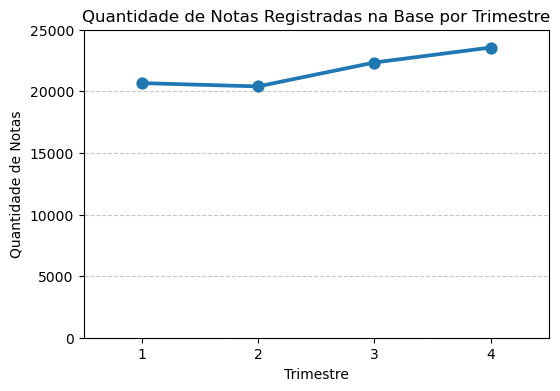

In [82]:
# Plot: quantidade de notas registradas na base por período
plt.figure(figsize=(6, 4))
sns.pointplot(data=quantidade_nota_periodo, x='trimestre', y='quantidade', markers='o')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas Registradas na Base por Trimestre')
plt.ylim(0, 25000) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

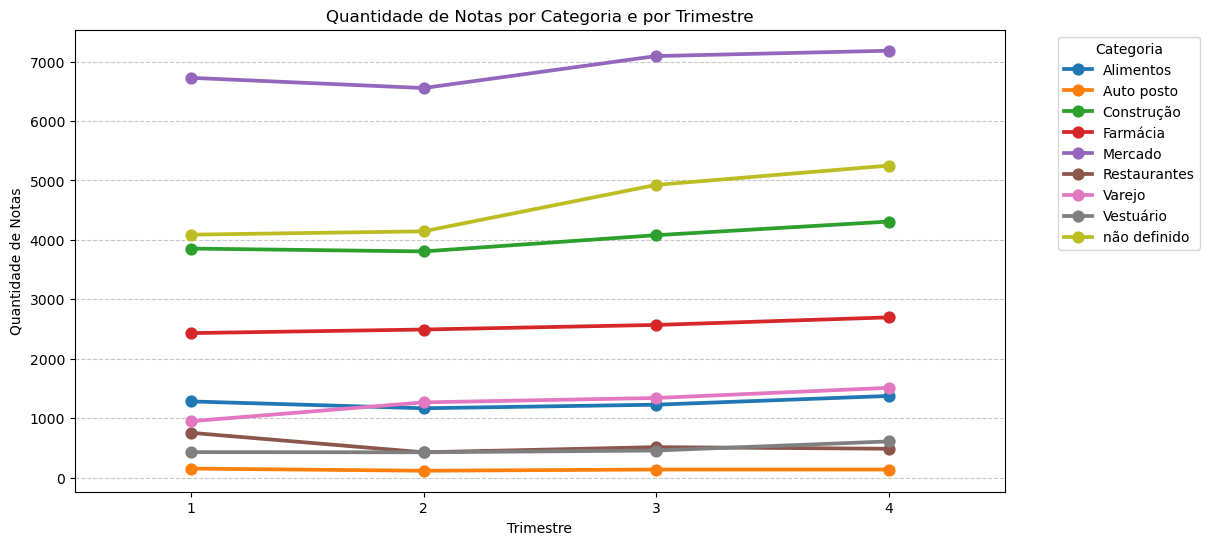

In [88]:
# Plot: quantidade de notas por categoria e por período
plt.figure(figsize=(12, 6))
sns.pointplot(data=quantidade_nota_categoria_periodo, x='trimestre', y='quantidade', hue='categoria', markers='o')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas por Categoria e por Trimestre')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

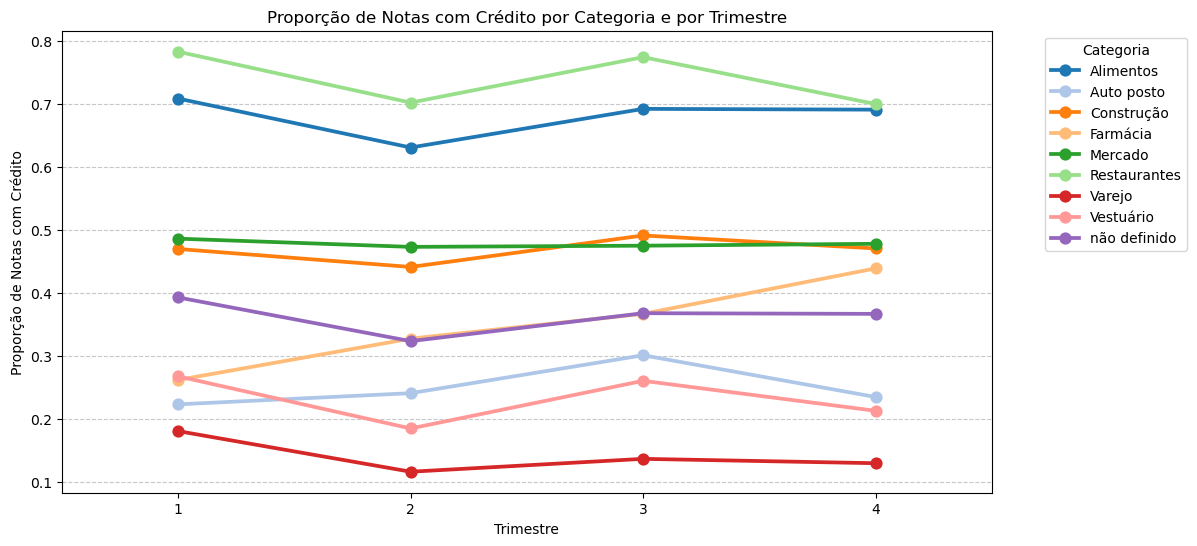

In [90]:
# Plot: proporção de notas com crédito por categoria e por período
plt.figure(figsize=(12, 6))
sns.pointplot(data=proporcao_credito, x='trimestre', y='proporcao', hue='categoria', markers='o')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.title('Proporção de Notas com Crédito por Categoria e por Trimestre')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [94]:
def calc_woe_iv(df, var, target):
   
    total_eventos = df[target].sum()
    total_nao_eventos = df[target].count() - total_eventos    
    grupo = df.groupby(var)[target].agg(['sum', 'count']).reset_index()
    grupo.columns = [var, 'eventos', 'total']
    grupo['nao_eventos'] = grupo['total'] - grupo['eventos']
    grupo['perc_eventos'] = grupo['eventos'] / total_eventos
    grupo['perc_nao_eventos'] = grupo['nao_eventos'] / total_nao_eventos
    
    # WOE
    grupo['woe'] = np.log(grupo['perc_eventos'] / grupo['perc_nao_eventos'])    
    # IV parcial
    grupo['iv_parcial'] = (grupo['perc_eventos'] - grupo['perc_nao_eventos']) * grupo['woe']    
    # IV total
    iv = grupo['iv_parcial'].sum()
    
    return grupo[[var, 'woe', 'iv_parcial']], iv



In [96]:
# Lista para armazenar os dados
woe_iv_tempo = []

# Iterando sobre os trimestres
for trimestre in df['trimestre'].unique():
    df_trim = df[df['trimestre'] == trimestre]
    woe_iv, iv = calc_woe_iv(df_trim, 'categoria', 'resposta')
    
    # Adicionando os dados de WOE e IV para cada categoria
    woe_iv_tempo.extend([{'trimestre': trimestre, 'categoria': row['categoria'], 'woe': row['woe'], 'iv': iv}
                         for _, row in woe_iv.iterrows()])

# Criando o DataFrame com os dados
woe_iv_df = pd.DataFrame(woe_iv_tempo)


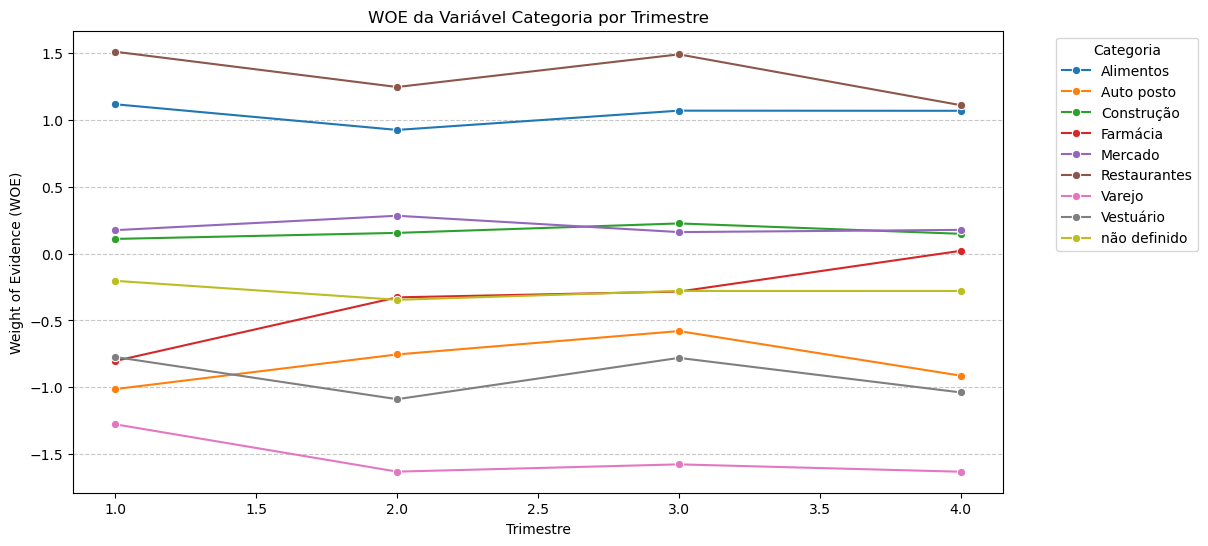

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=woe_iv_df, x='trimestre', y='woe', hue='categoria', marker='o')

# Configurações adicionais
plt.xlabel('Trimestre')
plt.ylabel('Weight of Evidence (WOE)')
plt.title('WOE da Variável Categoria por Trimestre')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibe o gráfico
plt.show()


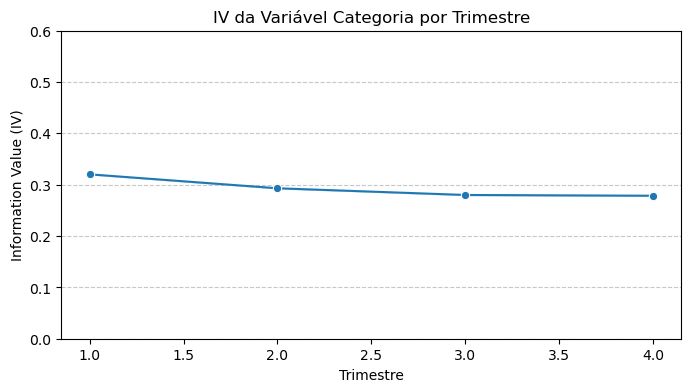

In [102]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=woe_iv_df, x='trimestre', y='iv', marker='o')

# Definindo configurações do gráfico
plt.title('IV da Variável Categoria por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Information Value (IV)')
plt.ylim(0, 0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.show()


In [104]:
eventos_df = df.groupby('categoria').agg(
    eventos=('resposta', 'sum'),
    total=('resposta', 'count')
).reset_index()
eventos_df['nao_eventos'] = eventos_df['total'] - eventos_df['eventos']

eventos_df = eventos_df[['categoria', 'eventos', 'nao_eventos']]
eventos_df['nao_eventos'] = -eventos_df['nao_eventos']

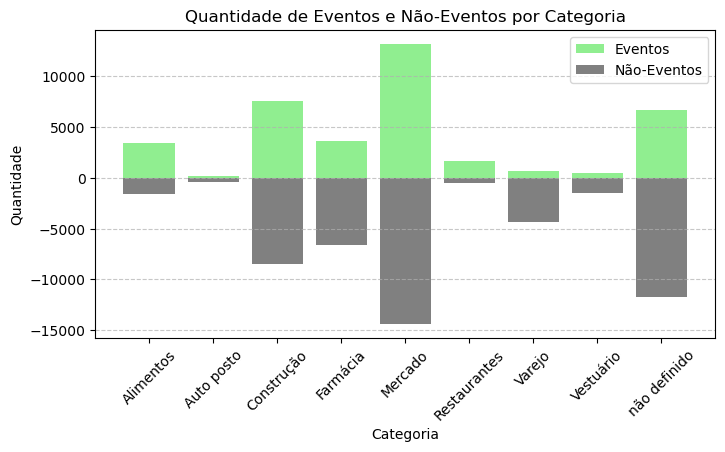

In [110]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(eventos_df['categoria'], eventos_df['eventos'], color='lightgreen', label='Eventos')
ax.bar(eventos_df['categoria'], eventos_df['nao_eventos'], color='grey', label='Não-Eventos')
ax.set_xlabel('Categoria')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Eventos e Não-Eventos por Categoria')
ax.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

> - pelos gráficos de proporção e WOE, Alimentos e Restaurantes, tem maior retorno de crédito, sendo superiores a maioria. As variações entre trimestres são muito leves.
> - A variável categoria apresenta um valor de IV estável com o trimestre, no período observado